In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from prophet import Prophet

DADOS DAS VENDAS

In [2]:
sales_train_df = pd.read_csv('train.csv')
sales_train_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3136\1441187077.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
sales_train_df.shape

(1017209, 9)

In [5]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [8]:
sales_train_df['Open'].unique()

array([1, 0], dtype=int64)

In [9]:
sales_train_df['Promo'].unique()

array([1, 0], dtype=int64)

In [10]:
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [11]:
sales_train_df['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

In [12]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [13]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


DADOS DAS LOJAS


In [14]:
store_info_df = pd.read_csv('store.csv')

In [15]:
store_info_df.shape

(1115, 10)

In [16]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [18]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [19]:
store_info_df['CompetitionDistance']

0        1270.0
1         570.0
2       14130.0
3         620.0
4       29910.0
         ...   
1110     1900.0
1111     1880.0
1112     9260.0
1113      870.0
1114     5350.0
Name: CompetitionDistance, Length: 1115, dtype: float64

DADOS DAS VENDAS

<Axes: >

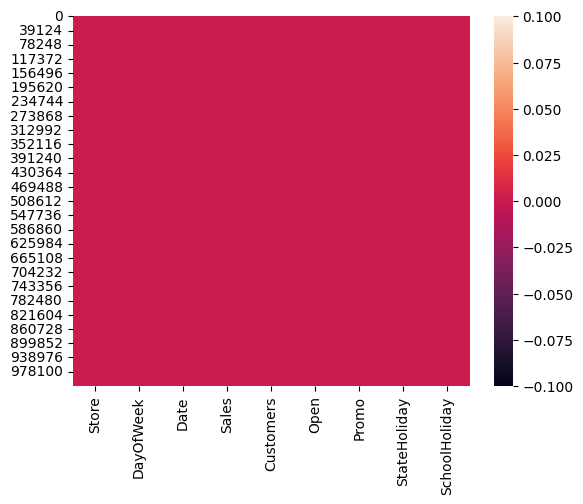

In [20]:
sns.heatmap(sales_train_df.isnull())

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

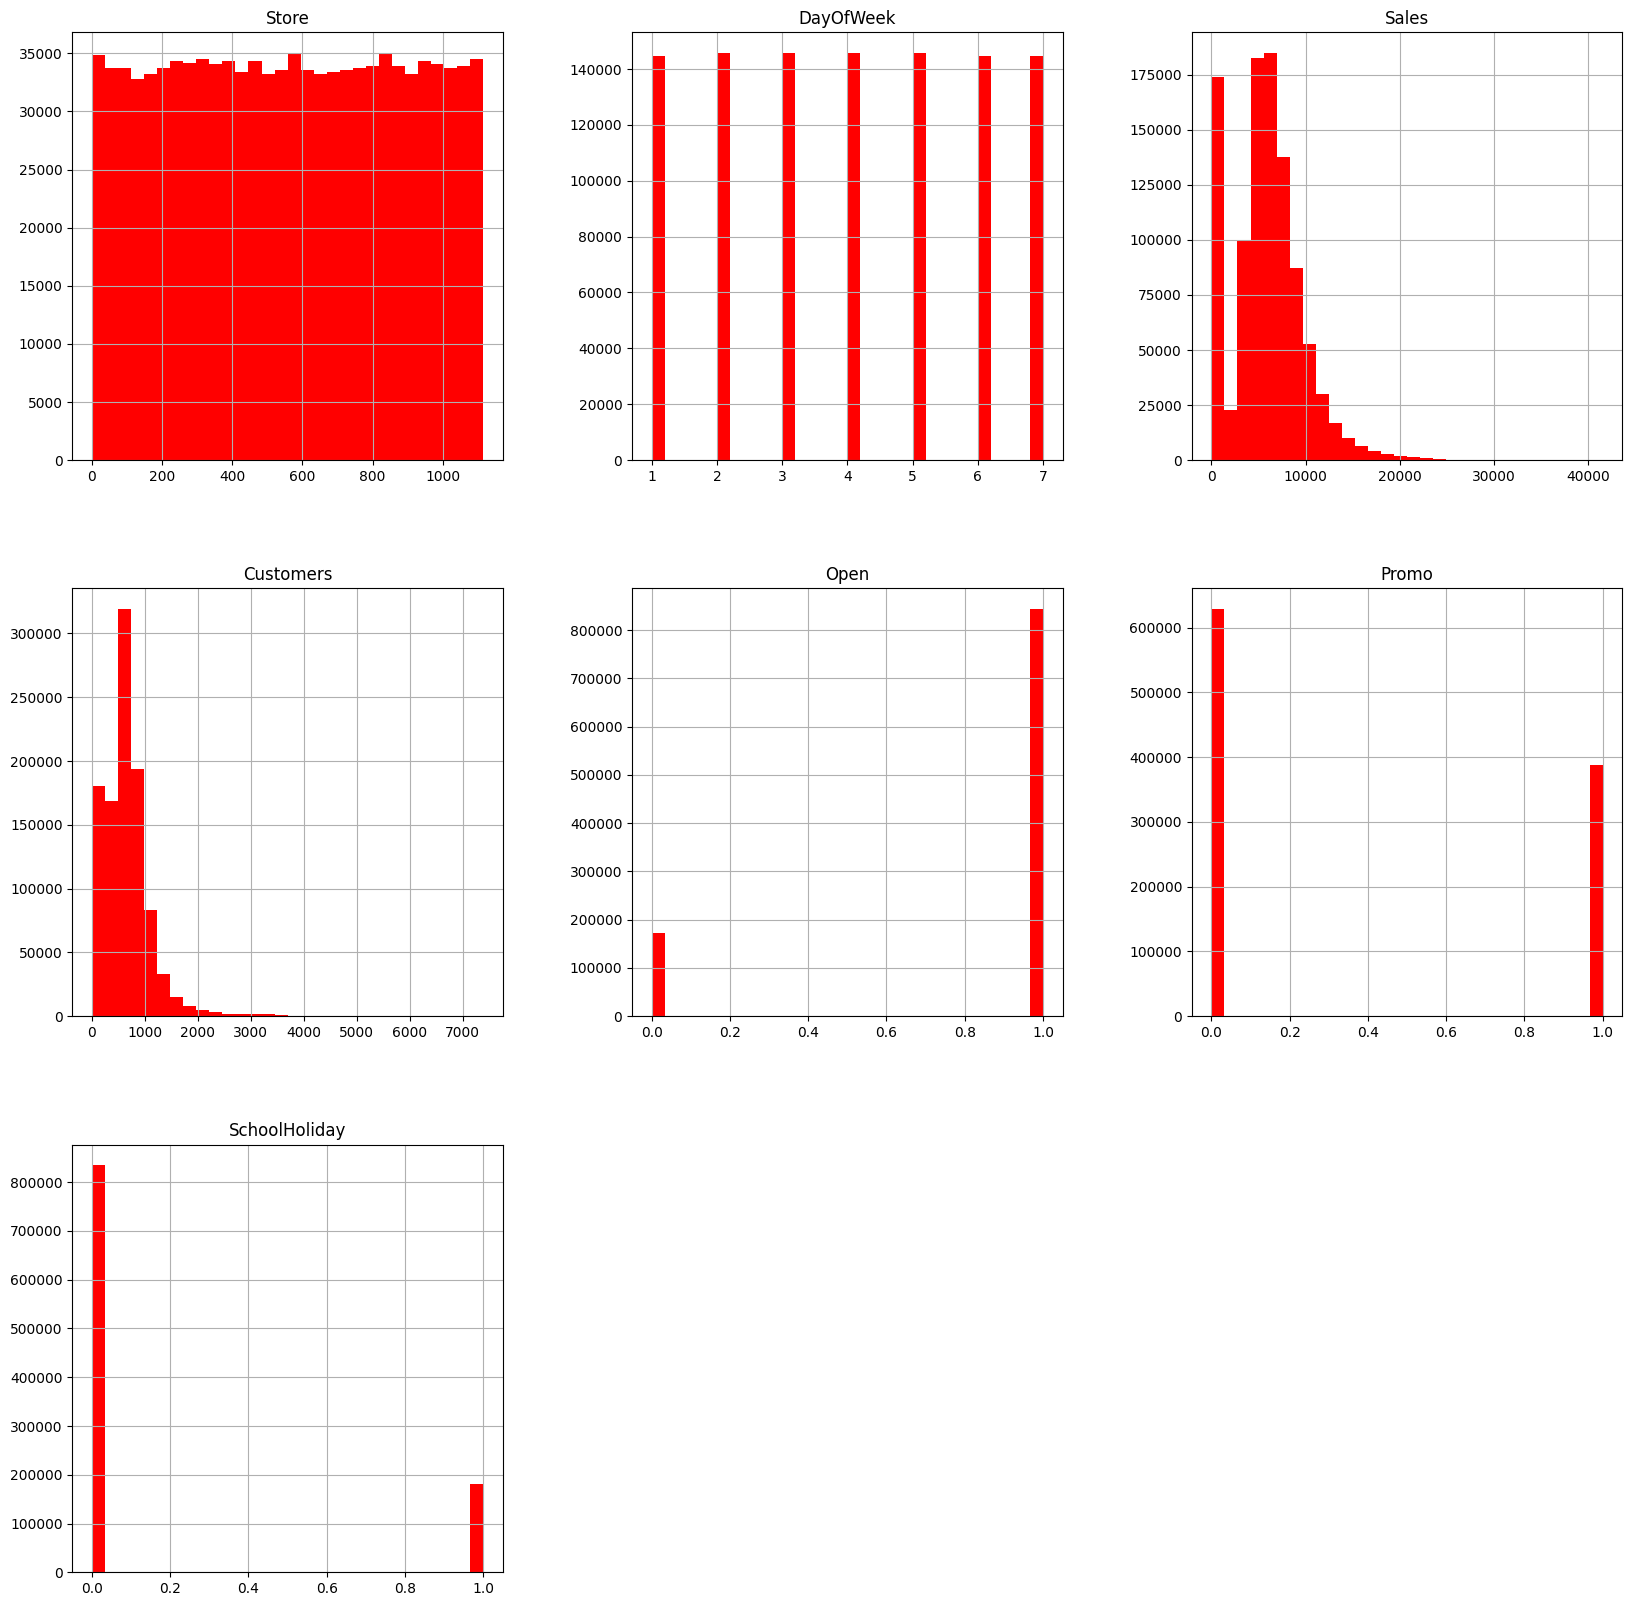

In [21]:
sales_train_df.hist(bins=30, figsize=(20,20), color= 'r')

In [22]:
sales_train_df['Customers'].max()

7388

In [23]:
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [24]:
print('Total = ', len(sales_train_df))
print('Número de lojas/dias fechado = ', len(closed_train_df))
print('Número de lojas/dias aberto = ', len(open_train_df))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


In [25]:
172817 /len(store_info_df)

154.99282511210762

In [26]:
closed_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


In [27]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [28]:
sales_train_df.shape

(844392, 9)

In [29]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [30]:
sales_train_df.drop(['Open'], axis=1, inplace=True)

In [31]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [32]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


DADOS DAS LOJAS

<Axes: >

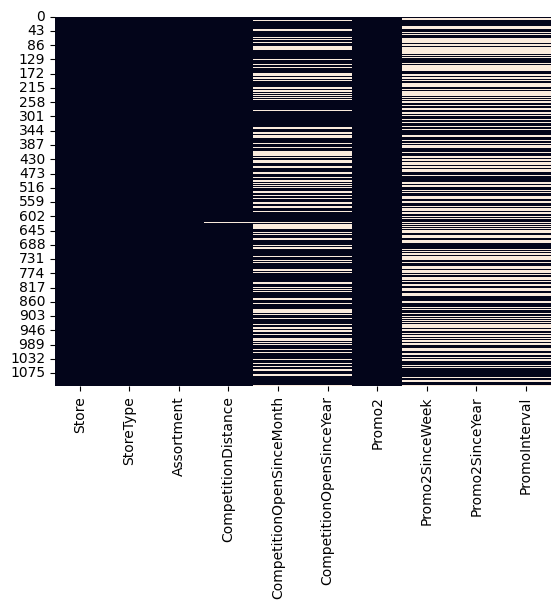

In [33]:
sns.heatmap(store_info_df.isnull(), cbar=False)

In [34]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [35]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [36]:
store_info_df[store_info_df["CompetitionOpenSinceYear"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [37]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [38]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
    store_info_df[str]. fillna(0, inplace=True)

<Axes: >

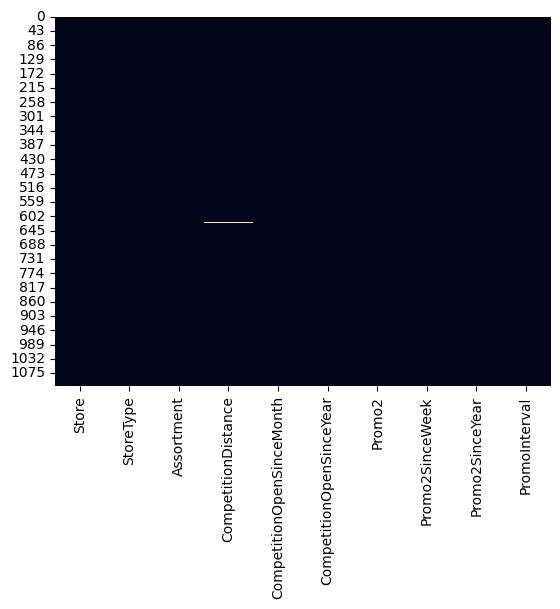

In [39]:
sns.heatmap(store_info_df.isnull(), cbar=False)

In [40]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

<Axes: >

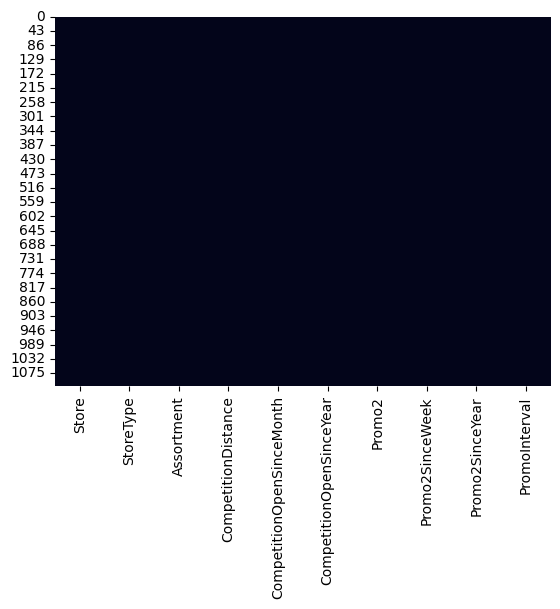

In [41]:
sns.heatmap(store_info_df.isnull(), cbar=False)

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

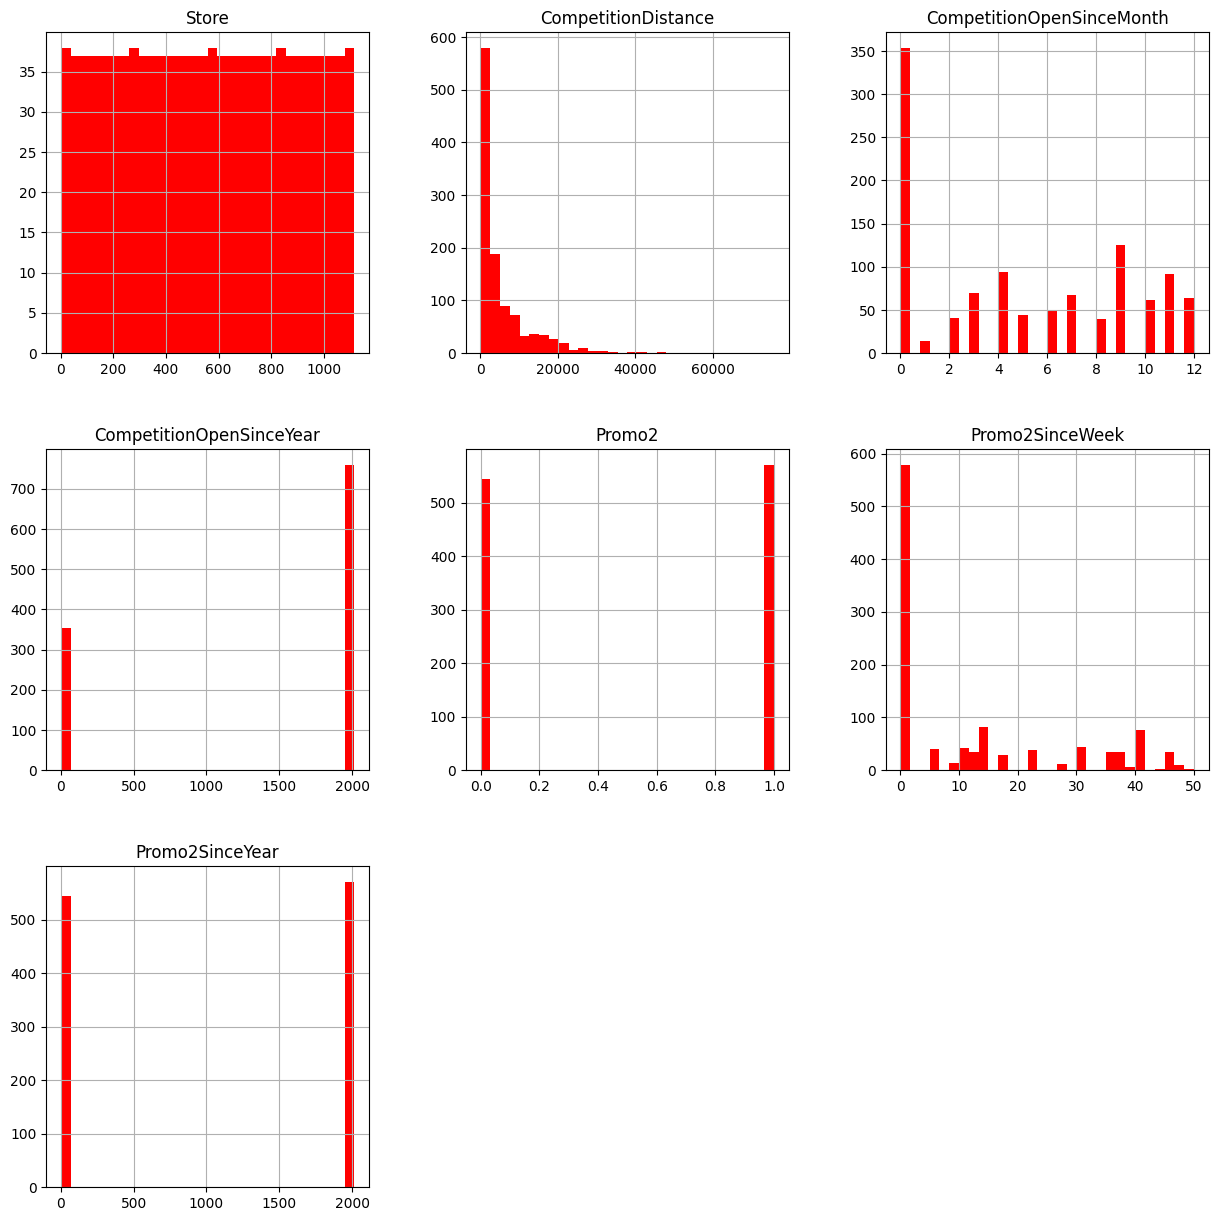

In [42]:
store_info_df.hist(bins=30, figsize=(15,15), color= 'r')

DADOS UNIDOS ( LOJAS + VENDAS)

In [43]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [44]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [45]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how='inner', on= 'Store')

In [46]:
sales_train_all_df.shape

(844392, 17)

In [47]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [48]:
numeric_columns = sales_train_all_df.select_dtypes(include=[np.number])

<Axes: >

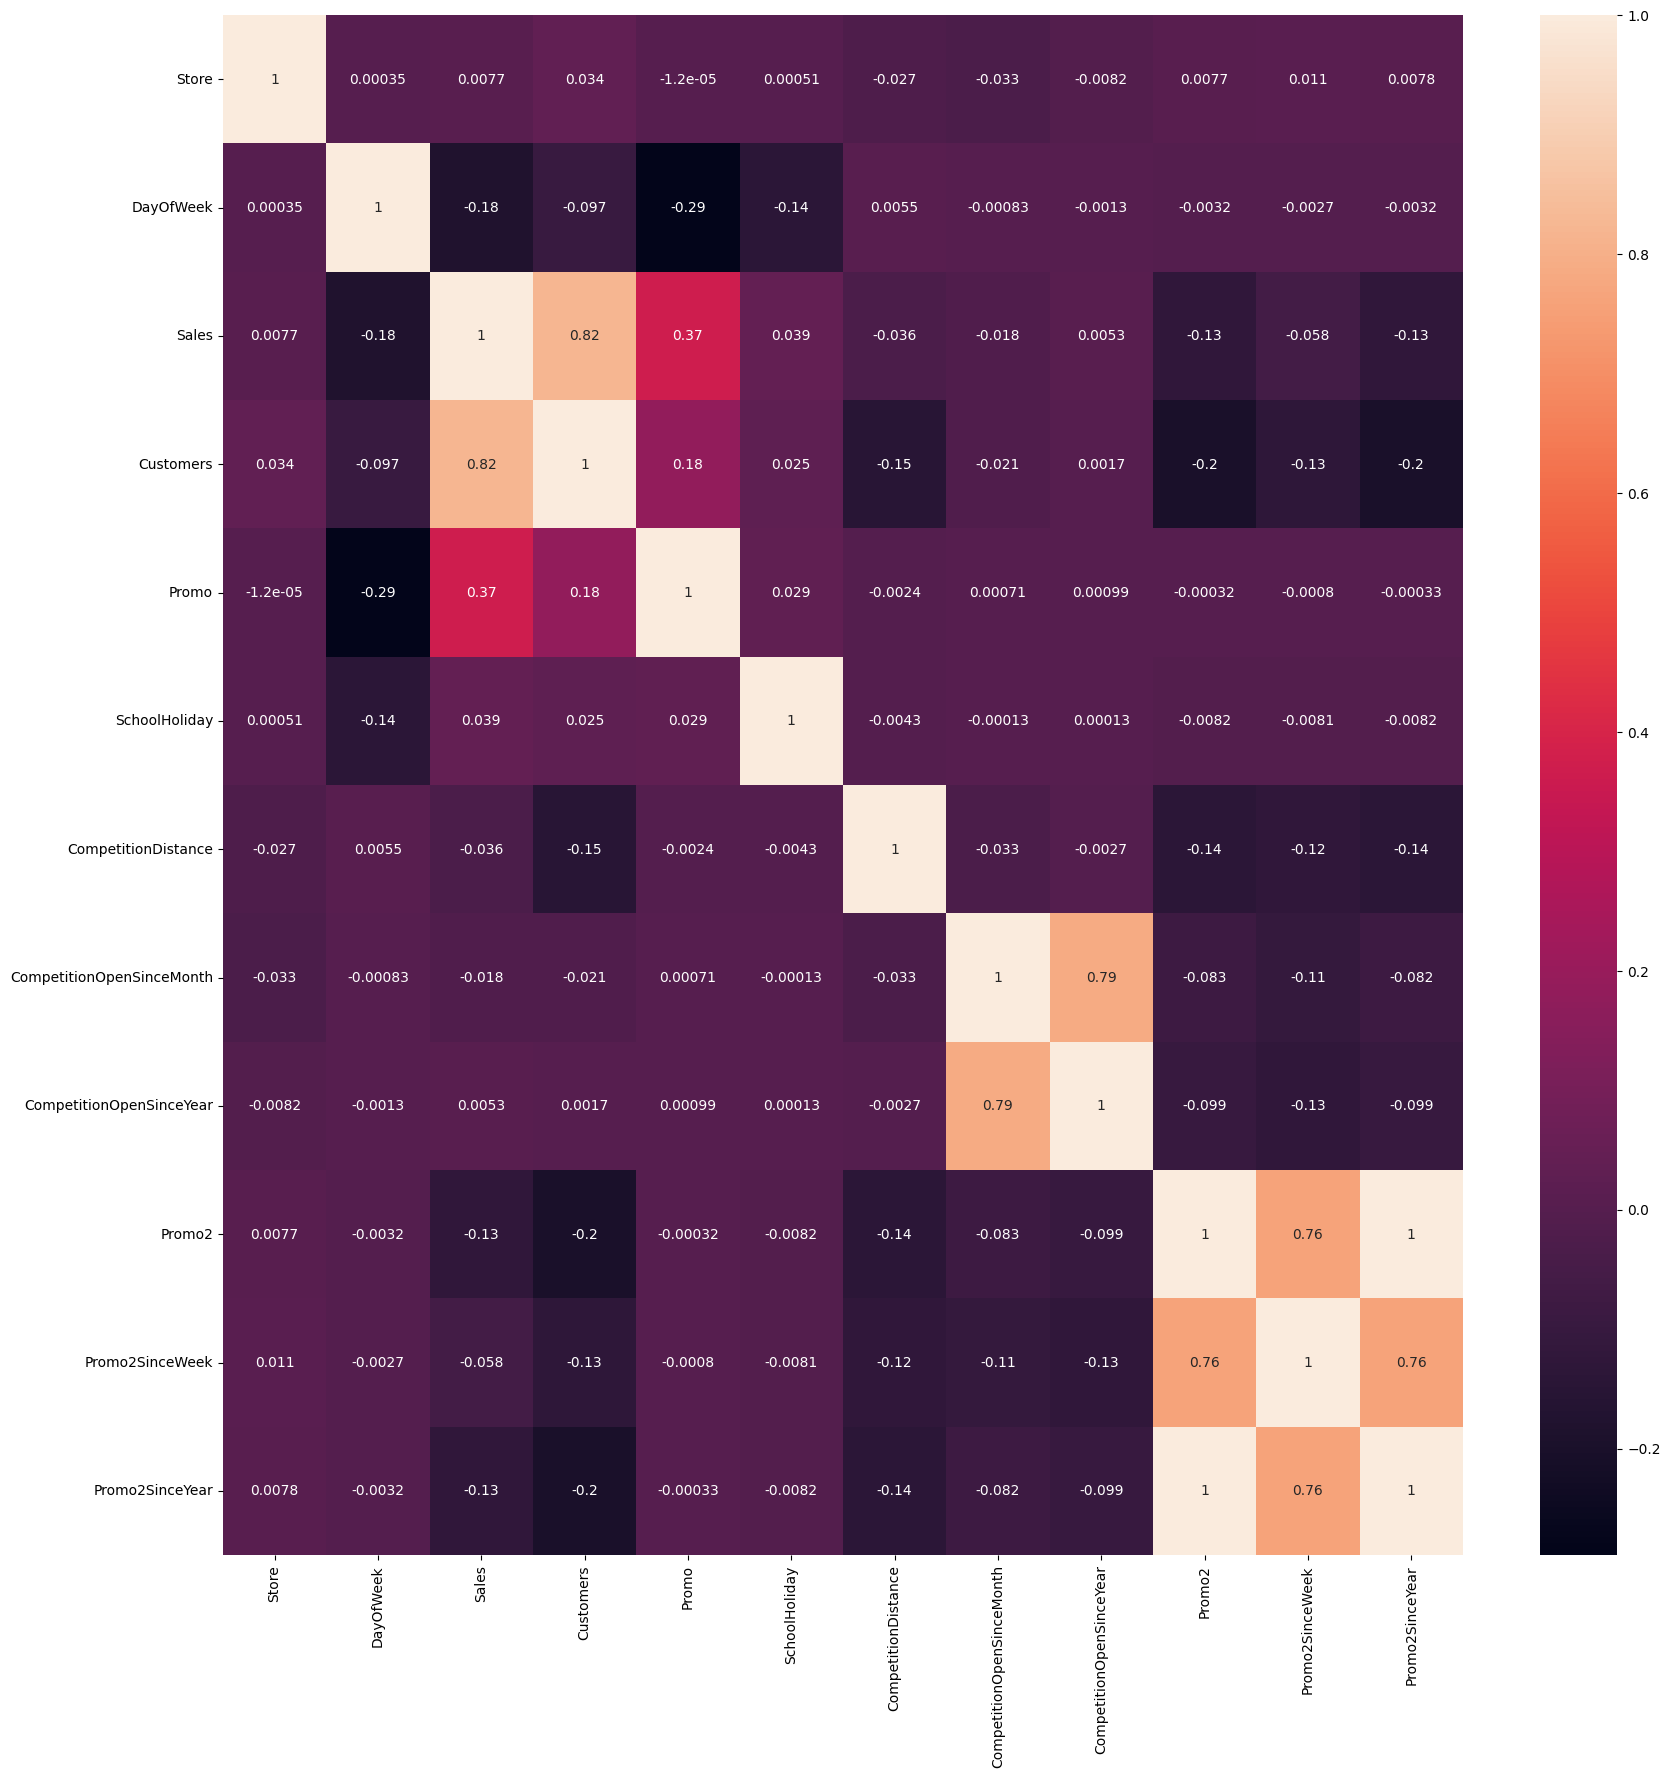

In [49]:
correlations = numeric_columns.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)

In [50]:
correlations = numeric_columns.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [51]:
sales_train_all_df["Year"] = pd.DatetimeIndex(sales_train_all_df["Date"]).year


In [52]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015


In [53]:
sales_train_all_df["Month"] = pd.DatetimeIndex(sales_train_all_df["Date"]).month
sales_train_all_df["Day"] = pd.DatetimeIndex(sales_train_all_df["Date"]).day

In [54]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


Text(0.5, 1.0, 'Média de vendas por mês')

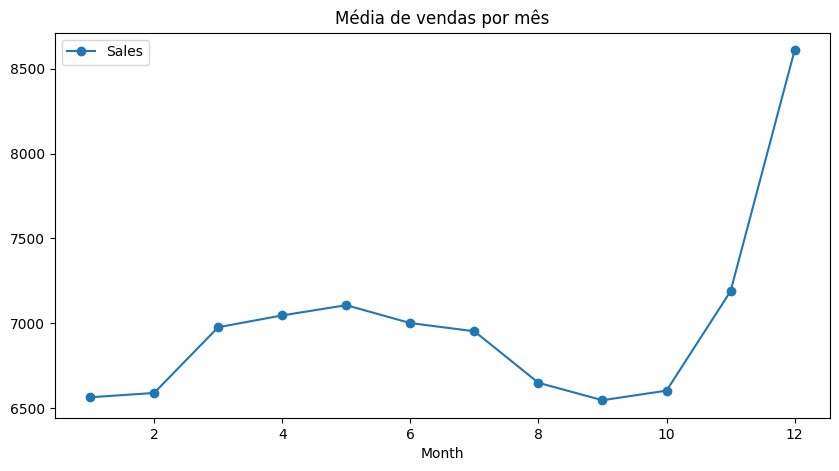

In [55]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Média de vendas por mês')

Text(0.5, 1.0, 'Média de clientes por mês')

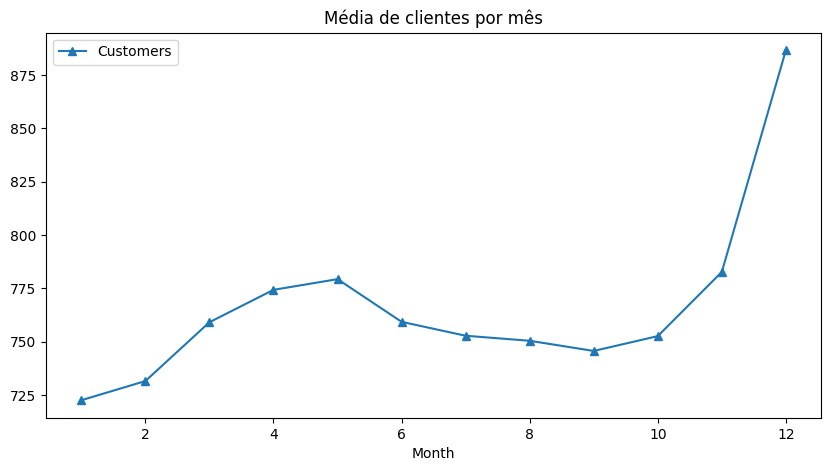

In [56]:
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize=(10,5), marker = '^')
axis.set_title('Média de clientes por mês')

Text(0.5, 1.0, 'Média de vendas por dia')

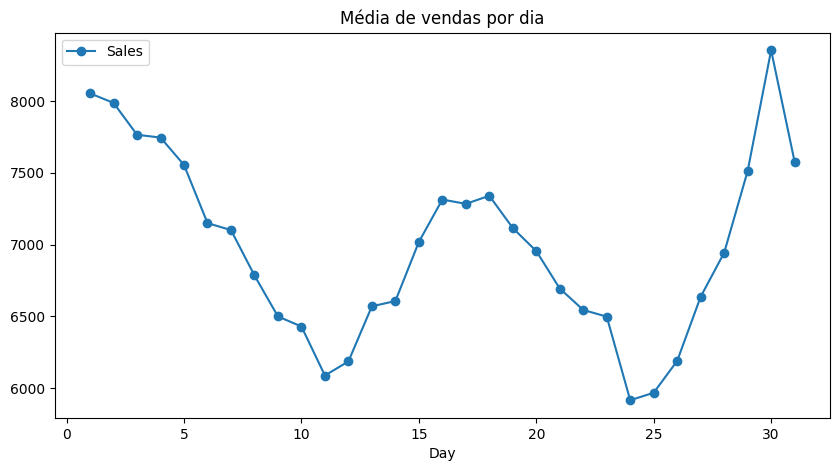

In [57]:
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Média de vendas por dia')

Text(0.5, 1.0, 'Média de vendas por dia')

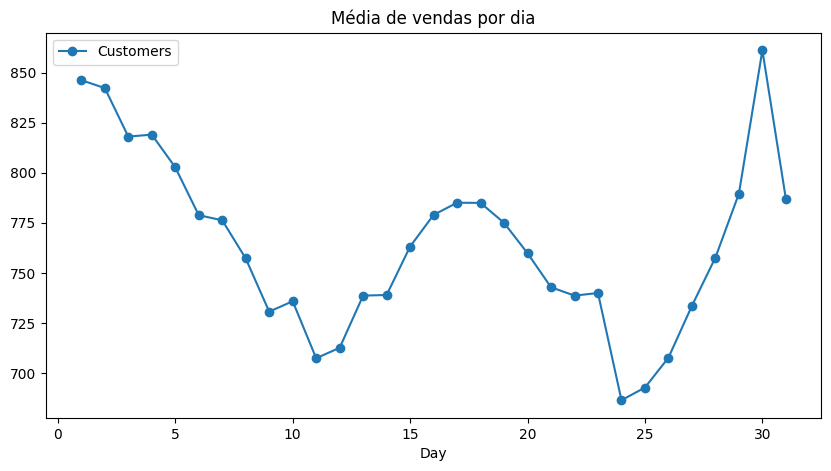

In [58]:
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Média de vendas por dia')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

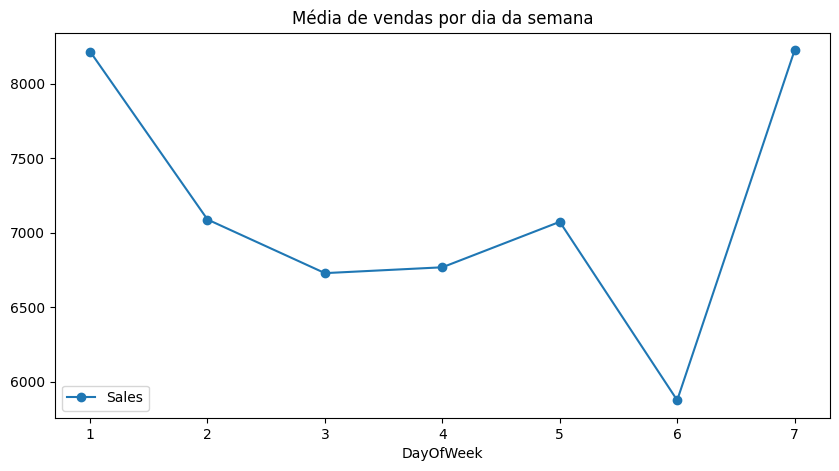

In [59]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Média de vendas por dia da semana')

Text(0.5, 1.0, 'Média de vendas por dia')

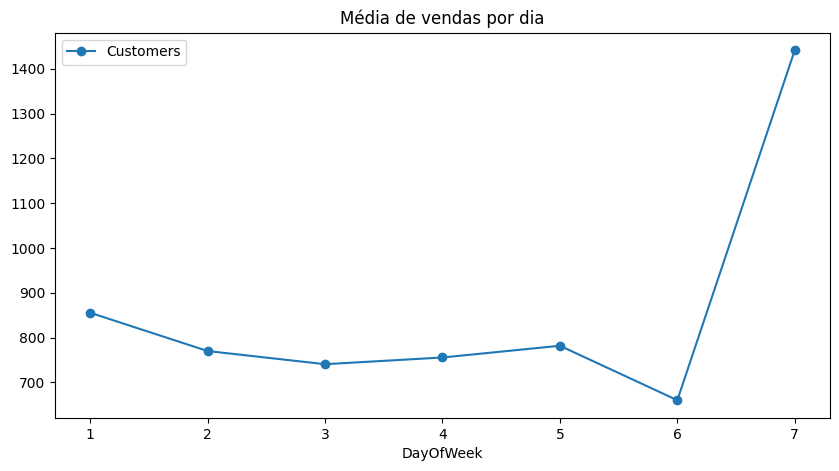

In [60]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Média de vendas por dia')

<Axes: xlabel='Promo', ylabel='Sales'>

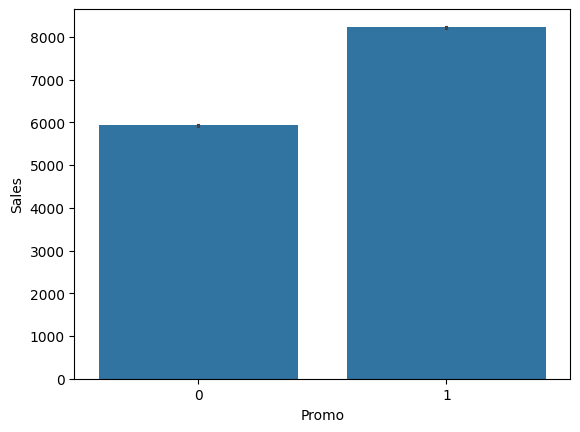

In [61]:
sns.barplot(x='Promo', y='Sales', data=sales_train_all_df)

<Axes: xlabel='Promo', ylabel='Customers'>

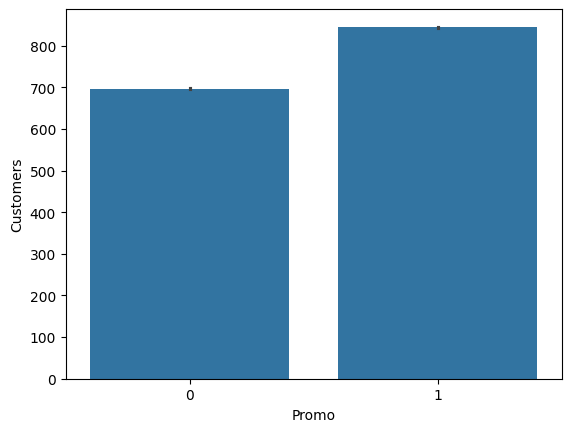

In [62]:
sns.barplot(x="Promo", y="Customers", data=sales_train_all_df)

TREINAMENTO DE MODELO DE PREVISÃO

In [67]:
# Date: ds
# Sales: y
def sales_prediction(store_id, sales_df, periods):
    sales_df = sales_df[sales_df["Store"] == store_id]
    sales_df = sales_df[["Date", "Sales"]].rename(columns={"Date": "ds", "Sales": "y"})
    sales_df = sales_df.sort_values(by="ds")

    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel="Data", ylabel="Vendas")
    figure2 = model.plot_components(forecast)

    return sales_df, forecast

In [68]:
# df = sales_prediction(10, sales_train_all_df, 60)
# df

19:28:51 - cmdstanpy - INFO - Chain [1] start processing
19:28:51 - cmdstanpy - INFO - Chain [1] done processing


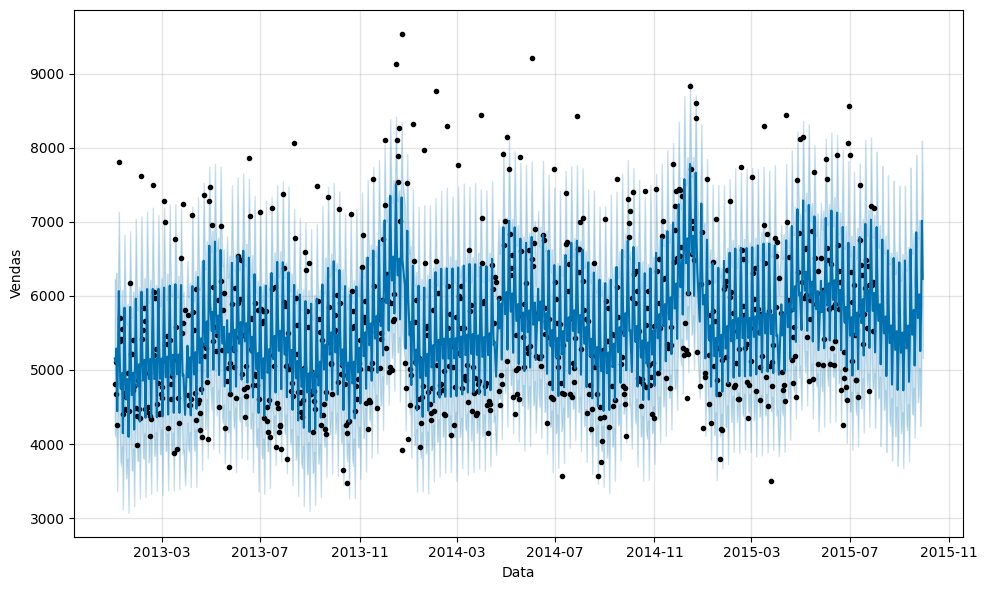

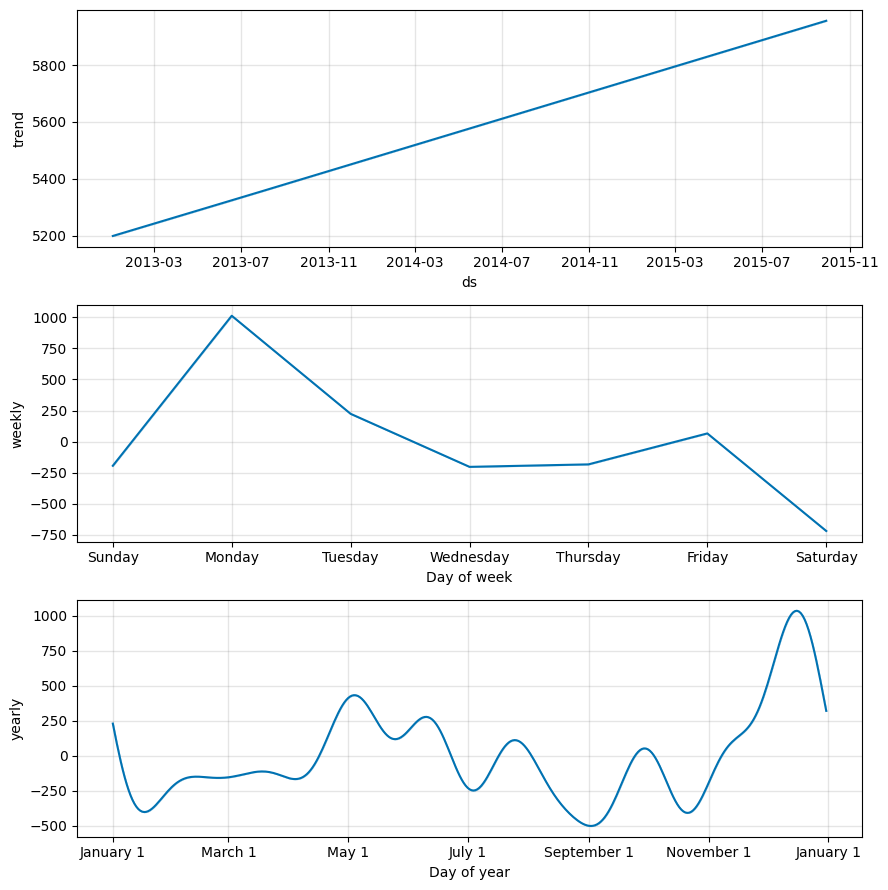

In [69]:
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 60)

In [70]:
df_origin.shape, df_prediction.shape

((784, 2), (844, 19))

In [71]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5199.099948,4151.252801,6223.267896,5199.099948,5199.099948,-44.921231,-44.921231,-44.921231,-203.566572,-203.566572,-203.566572,158.645341,158.645341,158.645341,0.0,0.0,0.0,5154.178717
1,2013-01-03,5199.850341,4098.973254,6216.869940,5199.850341,5199.850341,-93.788688,-93.788688,-93.788688,-183.601005,-183.601005,-183.601005,89.812317,89.812317,89.812317,0.0,0.0,0.0,5106.061652
2,2013-01-04,5200.600733,4230.268242,6311.558231,5200.600733,5200.600733,89.458214,89.458214,89.458214,65.552114,65.552114,65.552114,23.906100,23.906100,23.906100,0.0,0.0,0.0,5290.058947
3,2013-01-05,5201.351126,3361.110797,5479.667095,5201.351126,5201.351126,-757.966443,-757.966443,-757.966443,-719.517640,-719.517640,-719.517640,-38.448803,-38.448803,-38.448803,0.0,0.0,0.0,4443.384683
4,2013-01-07,5202.851912,5101.356276,7134.029059,5202.851912,5202.851912,862.187545,862.187545,862.187545,1012.596314,1012.596314,1012.596314,-150.408768,-150.408768,-150.408768,0.0,0.0,0.0,6065.039457


In [77]:
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5910.835734,4219.713695,6296.191537,5910.835734,5910.835734,-674.046863,-674.046863,-674.046863,-719.517640,-719.517640,-719.517640,45.470777,45.470777,45.470777,0.0,0.0,0.0,5236.788871
785,2015-08-02,5911.593246,4656.246366,6797.970508,5911.593246,5911.593246,-169.498769,-169.498769,-169.498769,-194.744308,-194.744308,-194.744308,25.245538,25.245538,25.245538,0.0,0.0,0.0,5742.094476
786,2015-08-03,5912.350758,5870.457922,7946.856873,5912.350758,5912.350758,1015.856381,1015.856381,1015.856381,1012.596314,1012.596314,1012.596314,3.260068,3.260068,3.260068,0.0,0.0,0.0,6928.207139
787,2015-08-04,5913.108269,5118.819176,7243.000718,5913.108269,5913.108269,203.153661,203.153661,203.153661,223.281098,223.281098,223.281098,-20.127436,-20.127436,-20.127436,0.0,0.0,0.0,6116.261931
788,2015-08-05,5913.865781,4614.103731,6645.991955,5913.865781,5913.865781,-248.128500,-248.128500,-248.128500,-203.566572,-203.566572,-203.566572,-44.561928,-44.561928,-44.561928,0.0,0.0,0.0,5665.737281
789,2015-08-06,5914.623293,4635.556489,6761.367837,5914.623293,5914.623293,-253.301259,-253.301259,-253.301259,-183.601005,-183.601005,-183.601005,-69.700254,-69.700254,-69.700254,0.0,0.0,0.0,5661.322033
790,2015-08-07,5915.380804,4911.654975,6953.533194,5915.380804,5915.380804,-29.666854,-29.666854,-29.666854,65.552114,65.552114,65.552114,-95.218968,-95.218968,-95.218968,0.0,0.0,0.0,5885.713951
791,2015-08-08,5916.138316,3974.181818,6052.914584,5916.138316,5916.138342,-840.338657,-840.338657,-840.338657,-719.517640,-719.517640,-719.517640,-120.821017,-120.821017,-120.821017,0.0,0.0,0.0,5075.799659
792,2015-08-09,5916.895828,4594.616222,6574.700527,5916.895828,5916.895885,-340.985453,-340.985453,-340.985453,-194.744308,-194.744308,-194.744308,-146.241145,-146.241145,-146.241145,0.0,0.0,0.0,5575.910375
793,2015-08-10,5917.653340,5627.730791,7750.909441,5917.653314,5917.653513,841.346444,841.346444,841.346444,1012.596314,1012.596314,1012.596314,-171.249870,-171.249870,-171.249870,0.0,0.0,0.0,6758.999783


In [73]:
df_prediction.tail(60).to_csv("previsoes_vendas.csv")

In [80]:
print(df_prediction[['ds','yhat']].tail(60))

            ds         yhat
784 2015-08-01  5236.788871
785 2015-08-02  5742.094476
786 2015-08-03  6928.207139
787 2015-08-04  6116.261931
788 2015-08-05  5665.737281
789 2015-08-06  5661.322033
790 2015-08-07  5885.713951
791 2015-08-08  5075.799659
792 2015-08-09  5575.910375
793 2015-08-10  6758.999783
794 2015-08-11  5946.035968
795 2015-08-12  5496.294269
796 2015-08-13  5494.233584
797 2015-08-14  5722.304602
798 2015-08-15  4917.139659
799 2015-08-16  5422.818209
800 2015-08-17  6612.053976
801 2015-08-18  5805.595397
802 2015-08-19  5362.525936
803 2015-08-20  5367.146588
804 2015-08-21  5601.788834
805 2015-08-22  4803.007613
806 2015-08-23  5314.848225
807 2015-08-24  6510.033173
808 2015-08-25  5709.360586
809 2015-08-26  5272.000902
810 2015-08-27  5282.374219
811 2015-08-28  5522.956803
812 2015-08-29  4730.466509
813 2015-08-30  5249.121302
814 2015-08-31  6451.817175
815 2015-09-01  5659.517424
816 2015-09-02  5231.540250
817 2015-09-03  5252.427447
818 2015-09-04  5504

In [74]:
df_origin.tail()

,ds,y
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186
7036,2015-07-31,7185


TREINAMENTO DE MODELO DE PREVISÃO - FERIADOS

In [81]:
def sales_prediction(store_id, sales_df, holidays, periods):
    sales_df = sales_df[sales_df["Store"] == store_id]
    sales_df = sales_df[["Date", "Sales"]].rename(columns={"Date": "ds", "Sales": "y"})
    sales_df = sales_df.sort_values(by="ds")

    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel="Data", ylabel="Vendas")
    figure2 = model.plot_components(forecast)

    return sales_df, forecast

In [82]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


In [83]:
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [84]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [85]:
len(np.unique(school_holidays))

477

In [86]:
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') | 
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values

In [87]:
state_holidays.shape

(910,)

In [88]:
len(np.unique(state_holidays))

35

In [89]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [90]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [91]:
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


19:58:02 - cmdstanpy - INFO - Chain [1] start processing
19:58:02 - cmdstanpy - INFO - Chain [1] done processing


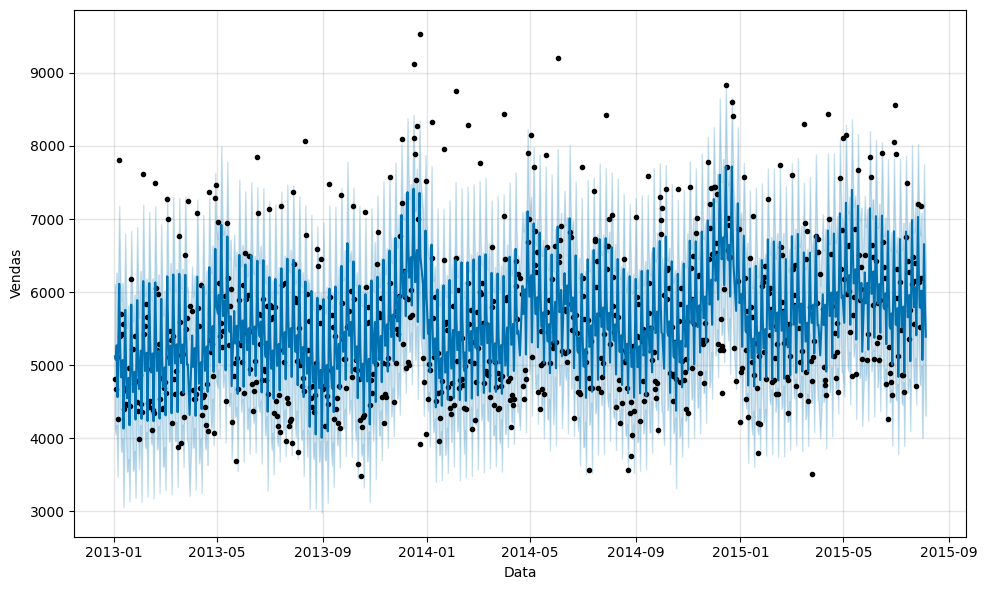

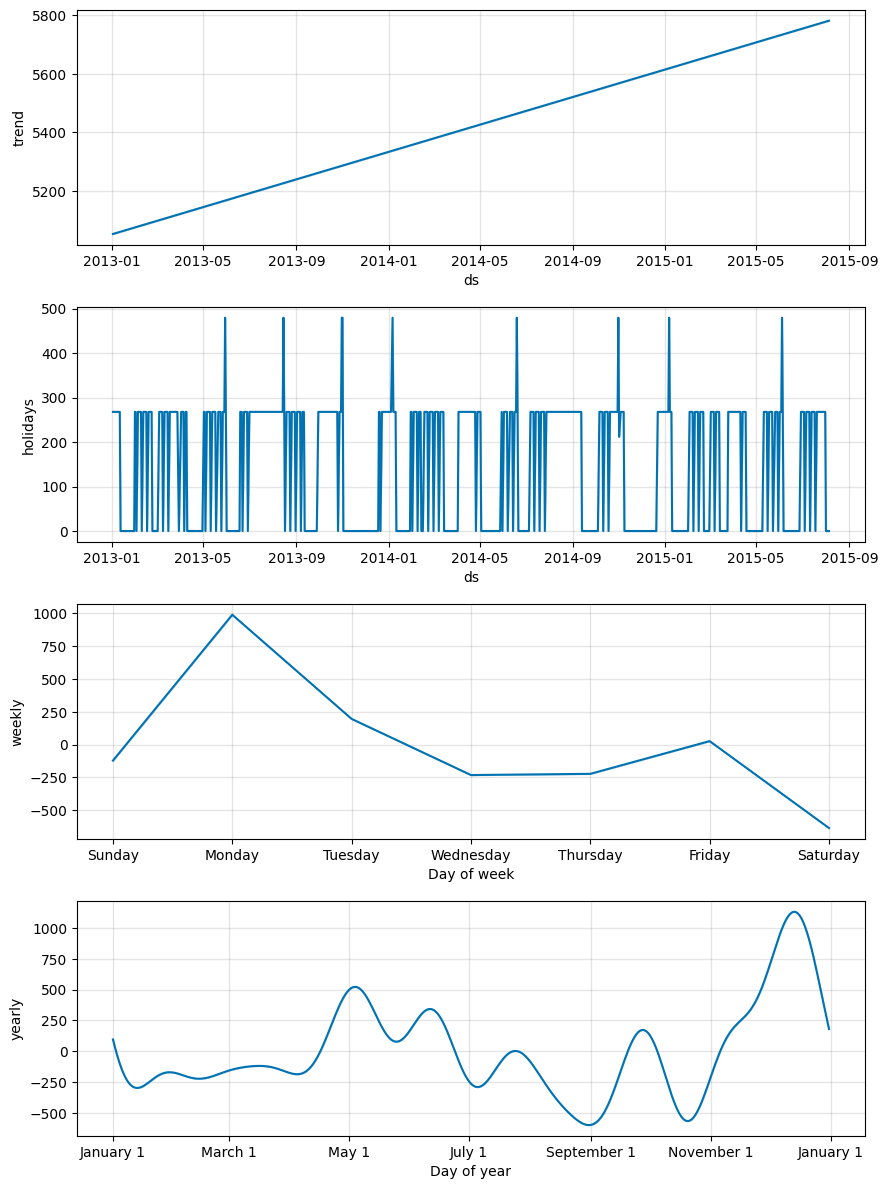

In [92]:
df_original, df_prediction = sales_prediction(10, sales_train_all_df, school_state_holidays, 5)

In [93]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5053.525302,4128.692688,6107.174658,5053.525302,5053.525302,68.443948,68.443948,68.443948,267.855823,...,-232.019382,-232.019382,-232.019382,32.607506,32.607506,32.607506,0.0,0.0,0.0,5121.969250
1,2013-01-03,5054.295593,4050.084904,6067.127426,5054.295593,5054.295593,19.324634,19.324634,19.324634,267.855823,...,-222.821974,-222.821974,-222.821974,-25.709215,-25.709215,-25.709215,0.0,0.0,0.0,5073.620227
2,2013-01-04,5055.065885,4180.047518,6264.513447,5055.065885,5055.065885,215.777768,215.777768,215.777768,267.855823,...,26.650928,26.650928,26.650928,-78.728983,-78.728983,-78.728983,0.0,0.0,0.0,5270.843652
3,2013-01-05,5055.836176,3472.223413,5617.140568,5055.836176,5055.836176,-494.126082,-494.126082,-494.126082,267.855823,...,-635.883323,-635.883323,-635.883323,-126.098583,-126.098583,-126.098583,0.0,0.0,0.0,4561.710094
4,2013-01-07,5057.376759,5062.314320,7181.358808,5057.376759,5057.376759,1054.752861,1054.752861,1054.752861,267.855823,...,989.975443,989.975443,989.975443,-203.078405,-203.078405,-203.078405,0.0,0.0,0.0,6112.129620
